<div >
    <img src = "../banner/banner_ML_UNLP_1900_200.png" />
</div>

<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/ML_UNLP_Lectures/blob/main/Week03/Notebook_Lasso.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>




# Regularization: Lasso

## Predicting Wages

Our objective today is to construct a model of individual wages

$$
w = f(X) + u
$$

where w is the  wage, and X is a matrix that includes potential explanatory variables/predictors. In this problem set, we will focus on a linear model of the form

\begin{align}
 ln(w) & = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p  + u
\end{align}

were $ln(w)$ is the logarithm of the wage.


Let's load the modules:

In [15]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

and the data set that is a sample of the NLSY97. The NLSY97 is  a nationally representative sample of 8,984 men and women born during the years 1980 through 1984 and living in the United States at the time of the initial survey in 1997.  Participants were ages 12 to 16 as of December 31, 1996.  Interviews were conducted annually from 1997 to 2011 and biennially since then.  

In [16]:
nlsy = pd.read_csv('https://raw.githubusercontent.com/ignaciomsarmiento/datasets/main/nlsy97.csv')

In [17]:
# some regressors
X1 = nlsy[[ "educ", "exp", "afqt", "mom_educ", "dad_educ"]]

# all but lnw_2016
X2=nlsy.drop(columns=['lnw_2016'])

y=nlsy['lnw_2016']

We want to construct a model that predicts well out of sample, and we have potentially 994 regressors. We are going to regularize this regression using Ridge.

## Lasso

We first illustrate ridge regression, which can be fit using `sklearn` and seeks to minimize

$$
\sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij}    \right) ^ 2 + \lambda \sum_{j=1}^{p} |\beta_j| .
$$

Notice that the intercept is not penalized.


Lasso penalizes the absolute value  of the coefficients. As a result, lasso shrinks coefficients toward zero all the way.



In [18]:
from sklearn.linear_model import  Lasso, LassoCV

In [19]:
?Lasso

The Lasso() function has an alpha argument (λ, but with a different name!) that is used to tune the model.

Let's run the ridge regression (we need to set the parameter `alpha` to zero)

In [20]:
lasso = Lasso(alpha = 0)

lasso.fit(X1, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.353e+02, tolerance: 9.558e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

Lasso(alpha=0)

In [21]:
lasso.coef_

array([7.98008598e-02, 3.32567085e-02, 4.84669044e-02, 9.17712877e-03,
       9.03319966e-05])

In [22]:
from sklearn import linear_model
lm=linear_model.LinearRegression().fit(X1,y)
lm.coef_

array([7.98008598e-02, 3.32567085e-02, 4.84669044e-02, 9.17712877e-03,
       9.03319966e-05])

In [23]:
lasso = Lasso(alpha = .11)

lasso.fit(X1, y)

lasso.coef_

array([ 0.04007168, -0.        ,  0.042182  ,  0.        ,  0.        ])

 We'll generate an array of alpha values ranging from very big to very small, essentially covering the full range of scenarios from the null model containing only the intercept, to the least squares fit:

In [24]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

Associated with each alpha value is a vector of ridge regression coefficients, which we'll store in a matrix coefs. In this case, it is a 5×100 matrix, with 19 rows (one for each predictor) and 100 columns (one for each value of alpha). Remember that we'll want to standardize the variables so that they are on the same scale. To do this, we can use the normalize = True parameter:

In [25]:
ridge = Lasso()
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X1, y)
    coefs.append(ridge.coef_)

np.shape(coefs)


(100, 5)

Let's see how  how much the coefficients are penalized for different values of $\lambda$. Notice none of the coefficients are forced to be zero, although they get close to it.

Text(0, 0.5, 'Coefs')

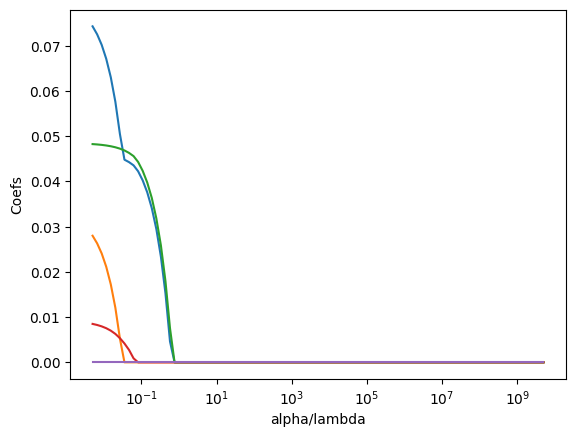

In [26]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha/lambda')
plt.ylabel('Coefs')

#### All the predictors

Text(0, 0.5, 'Coefs')

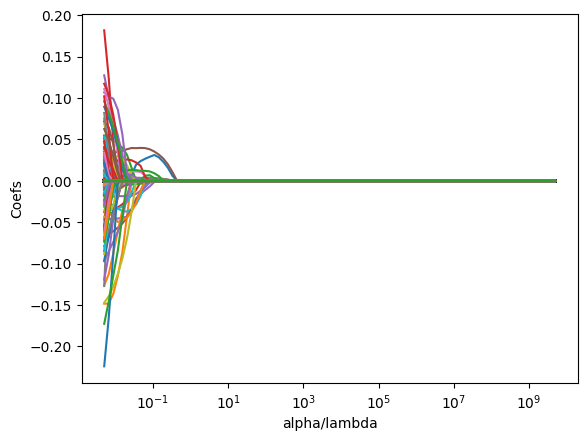

In [27]:
lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X2, y)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha/lambda')
plt.ylabel('Coefs')

## Penalty selection

Instead of arbitrarily choosing , it would be better to use cross-validation to choose the tuning parameter alpha. We can do this using the cross-validated lasso regression function, `LassoCV()`.

In [28]:

# Por defecto LassoCV utiliza el mean squared error
lasso_cv = LassoCV()

lasso_cv.fit(X = X2, y = y)



LassoCV()

In [29]:
lasso_cv_star = Lasso(alpha = lasso_cv.alpha_)
lasso_cv_star.fit(X2, y)

Lasso(alpha=0.0206253484344414)

In [30]:
lasso_cv_star.coef_

array([ 0.00000000e+00, -3.85824142e-02,  0.00000000e+00, -0.00000000e+00,
       -4.29891768e-02,  3.83758862e-02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  1.56821921e-03,  2.05340810e-04,
        3.05819794e-02,  4.22878634e-04, -0.00000000e+00, -0.00000000e+00,
        1.09970801e-02,  3.89563215e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -2.21517914e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -3.69168986e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  2.57986862e-02,
        8.76288735e-03, -4.35966928e-02,  0.00000000e+00,  3.55404204e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -

In [32]:
from sklearn.linear_model import ElasticNetCV


# Por defecto ElasticNetCV utiliza el mean squared error
elastic_cv = ElasticNetCV(
             l1_ratio=0.5,
             n_alphas=100,
            cv              = 5
         )

elastic_cv.fit(X = X2, y = y)



ElasticNetCV(cv=5)